輸入立委臉書粉專內容及選舉政見資料

In [1]:
import pandas as pd
import jieba
from tqdm import tqdm
import re
import matplotlib.pyplot as plt
fb1=pd.read_csv('nysu_10902_2019立委_research.csv')
fb2=pd.read_csv('nysu_10902_2019_research_right.csv')
fba=pd.merge(fb1,fb2,how="outer")
fb3=pd.read_csv('nysu_10902_2019立委_research_補.csv')
fb4=pd.read_csv('nysu_10902_2019立委_research_補2.csv')
fbb=pd.merge(fb3,fb4,how="outer")
fb5=pd.read_csv('nysu_10902_2019立委_research_補3.csv')
fb6=pd.read_csv('nysu_10902_2019立委_research_補4.csv')
fbc=pd.merge(fb5,fb6,how="outer")
fb7=pd.read_csv('nysu_10902_2019立委_research_補5.csv')

In [2]:
fbA=pd.merge(fba,fbb,how="outer")
fbB=pd.merge(fbc,fb7,how="outer")

In [3]:
fb=pd.merge(fbA,fbB,how="outer")
pd.set_option('display.max_colwidth', None)#setting the maximize string show
politics = pd.read_csv('9th_legislator_promise.csv')

In [4]:
import numpy as np
from collections import Counter

fb.page_name.unique() #觀察人名在資料集中叫什麼名字
politics.姓名.unique()

array(['吳思瑤', '姚文智', '何志偉', '蔣萬安', '李彥秀', '林昶佐', '蔣乃辛', '費鴻泰', '賴士葆',
       '呂 孫 綾', '林 淑 芬', '高志鵬', '余天', '吳 秉 叡', '蘇 巧 慧', '張 宏 陸', '羅 致 政',
       '江 永 昌', '林 德 福', '吳 琪 銘', '羅 明 才', '黃 國 昌', '蔡適應', '鄭 運 鵬',
       '陳賴素美', '陳學聖', '鄭寶清', '呂玉玲', '趙正宇', '林為洲', '柯建銘', '陳超明', '徐志榮',
       '蔡其昌', '顏寬恒', '洪慈庸', '張廖萬堅', '盧秀燕', '沈智慧', '黃國書', '何欣純', '江啟臣',
       '王惠美', '柯呈枋', '黃秀芳', '洪宗熠', '陳素月', '馬 文 君', '許 淑 華', '蘇 治 芬',
       '劉 建 國', '李 俊 俋', '蔡 易 餘', '陳 明 文', '葉宜津', '黃偉哲', '郭國文  ', '陳亭妃',
       '林俊憲', '王定宇', '邱 議 瑩', '邱 志 偉', '劉 世 芳', '林 岱 樺', '管 碧 玲', '李 昆 澤',
       '趙 天 麟', '馬 凱 妮', '賴 瑞 隆', '蘇震清', '鍾佳濱', '莊瑞雄', '陳歐珀', '蕭美琴',
       '劉櫂豪', '楊 曜', '楊鎮浯', '陳玉珍', '陳雪生', '廖國棟', '鄭天財', '陳瑩', '高金素梅',
       '簡東明', '孔文吉', nan], dtype=object)

以台北市立委李彥秀為例，建立發文文字斷詞表

In [5]:
lee = fb[fb.page_name == "李彥秀"]
lee.head(1)

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,link_name,link_description,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
20402,606321216096498_2117673888294549,606321216096498,李彥秀,政治人物,#家暴不是家務事 \n\n這幾天一個家暴個案的新聞連續幾天佔據媒體版面，不但令人傷心也令人憤怒。\n\n但是在滿滿的負面情緒之餘，我們更應該思考，家暴防治法民國87年通過，實施了20年，仍舊有加害人把家庭暴力當成家務事；家暴防治專線113宣導多時，連續性的家暴案件還是時有所聞。\n\n是宣導仍舊不夠嗎？\n是社工量能不足嗎？\n是後續介入輔導的工作應該更加仔細嗎？\n是我們的社會沒有給予被害人足夠的支持，讓他們勇敢走出受暴的場域嗎？\n是我們的法治沒有足夠的懲戒力，要求施暴者接受必需的處罰、輔導或是治療嗎？\n還是有其他應該關注我們卻忽略的面向英國去加強補足的？\n\n不論是那個面向的思考，似乎都有調整改進的空間，#家暴零容忍 不應只是說說，需要大家一起關注；需要政府更多的重視。\n\n#民代的喃喃自語,NaN,photo,https://www.facebook.com/606321216096498/posts/2117673888294549/,2019-01-15T09:10:24+0000,2019-01-15T17:10:24,...,NaN,NaN,425,0,0,0,0,0,20,9


In [6]:
lee['new_date'] = pd.to_datetime(lee['created_time_taipei']).dt.date
lee['month_year'] = pd.to_datetime(lee['new_date']).dt.to_period('M')
lee.head(1)

<ipython-input-6-f859ad3fc11a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lee['new_date'] = pd.to_datetime(lee['created_time_taipei']).dt.date
<ipython-input-6-f859ad3fc11a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lee['month_year'] = pd.to_datetime(lee['new_date']).dt.to_period('M')


,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,month_year
20402,606321216096498_2117673888294549,606321216096498,李彥秀,政治人物,#家暴不是家務事 \n\n這幾天一個家暴個案的新聞連續幾天佔據媒體版面，不但令人傷心也令人憤怒。\n\n但是在滿滿的負面情緒之餘，我們更應該思考，家暴防治法民國87年通過，實施了20年，仍舊有加害人把家庭暴力當成家務事；家暴防治專線113宣導多時，連續性的家暴案件還是時有所聞。\n\n是宣導仍舊不夠嗎？\n是社工量能不足嗎？\n是後續介入輔導的工作應該更加仔細嗎？\n是我們的社會沒有給予被害人足夠的支持，讓他們勇敢走出受暴的場域嗎？\n是我們的法治沒有足夠的懲戒力，要求施暴者接受必需的處罰、輔導或是治療嗎？\n還是有其他應該關注我們卻忽略的面向英國去加強補足的？\n\n不論是那個面向的思考，似乎都有調整改進的空間，#家暴零容忍 不應只是說說，需要大家一起關注；需要政府更多的重視。\n\n#民代的喃喃自語,NaN,photo,https://www.facebook.com/606321216096498/posts/2117673888294549/,2019-01-15T09:10:24+0000,2019-01-15T17:10:24,...,425,0,0,0,0,0,20,9,2019-01-15,2019-01


In [7]:
# 依照按讚數 低到高排序
lee = lee.sort_values(by=['like_count'])
# 用新的排序當作順序
lee.reset_index(inplace=True)

結巴斷詞 jieba

1.   len(liu): 看劉櫂豪的貼文總共有幾筆
2.   list(liu['message']): 把要斷詞的內容轉成 list 格式
3.   創造一個新的dataframe叫做liu_docs，型態是pandas.core.frame.DataFrame
4.   原本liu_docs裡面的'jieba_results'欄位型態是pandas.core.series.Series，需要轉成'str'(字串)型態才能做後續處理。

In [8]:
doc_names = range(len(lee)) #有幾篇文章 : 444 篇文章
doc_names

range(0, 540)

In [9]:
lee = lee.replace(np.nan, '', regex=True) # 將nan取代成空白字串
text_list = list(lee['message']) # 把所有message轉成一個list 用for iterate

What is the difference between lcult() & cut()

In [10]:
# 先看第一個
words = jieba.lcut(text_list[1], cut_all = False) # lcut return a "list"
print(words)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\User\AppData\Local\Temp\jieba.cache
Loading model cost 0.754 seconds.
Prefix dict has been built succesfully.


['也', '太美', '！', '\n', '一早', '看到', '心情', '好', '！']


In [11]:
words = jieba.cut(text_list[539], cut_all = False) 
print(words)
#for word in words:
 #   print(word)

<generator object Tokenizer.cut at 0x000001ACC86EDEB0>


把要存斷詞結果的dataframe準備好之後，就可以開始斷詞了。</br>

第一個迴圈</br> 剛才我們知道，劉櫂豪的篇數有999篇： 我們可以用一個for迴圈來跑每一篇文章，i是對應文章的意思，會從1(第一篇)跑到999(第999篇)；</br> 而text_list就是我們剛剛轉成list型態的劉櫂豪貼文內容；text_list[1]，就是取出list第一個元素(第一篇貼文)的意思。</br>

第二個迴圈</br> words存的是文章斷詞後的集合物件(object)，我們需要跑第二個for迴圈把集合裡面的字取出來，</br> word代表斷詞集合中的一個字，先把字轉換成str(字串)型態之後，字和字之間加上空格存在一起。

append加回斷詞欄位</br> 之後把text內容存到'jieba_results'這個欄位裡面，再和liu_docs合併。</br> 最後我們liu_docs，只會一個欄位jieba_results，存斷詞之後的結果。

In [12]:
import jieba
from tqdm import tqdm
import re
jieba.load_userdict("dict.txt")
punctuation = " //，：:""()\n!！？｡＂＃＄％＆＇（）＊＋－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘'‛“”„‟…‧﹏"""
re_punctuation = "[{}] ".format(punctuation)

# creat a df to store the jieba result
lee_docs = pd.DataFrame(columns=['jieba_results']) # 建立df
lee_docs['jieba_results'] = lee_docs['jieba_results'].astype('str')

for i in doc_names: #從第一篇到最後一篇
    words = jieba.cut(text_list[i], cut_all = False)
    text = ''
    for word in words:
        text = text + ' ' + str(word) 
    #print(words)
    #print(i) #第幾篇文章
    #print(text) #第幾篇文章的斷詞結果
    text = re.sub(re_punctuation, "", text) # 把上面那些符號從text中刪掉
    text = re.sub(r'[0-9]','',text) # 刪掉數字
    text = re.sub(r'[a-zA-Z]','',text) #刪掉英文字
#刪除文字 更多標點符號
    text = re.sub(r'[-<>#。！⋯.➡?=&▶_%♀!❗🎉⏰💪]','',text)  # 注意裡面不能有空白！
    s = pd.Series({'jieba_results': text})
    lee_docs = lee_docs.append(s, ignore_index=True)#每次的斷詞結果都加回liu_docs


In [13]:
#liu_docs.iloc[400:,]  #從讚數最多的檢查

In [14]:
lee['jieba_results'] = lee_docs
lee_post = lee[['new_date','message','jieba_results','like_count']]
lee_post

,new_date,message,jieba_results,like_count
0,2019-12-26,,,105
1,2019-01-24,也太美！\n一早看到心情好！,也 太美 一早 看到 心情 好,108
2,2019-04-17,等一下12:00，我在鄉民大會跟大家聊聊台獨金孫跟社運大小姐的英德大戰！\n\n#是郭台鳴宣布參選的的一個節目嗎\n#郭子乾\n#朱學恆\n#林俊憲\n#黃益中\n#四叉貓 #鄉民女神,等 一下 我 在 鄉民大會 跟 大家 聊聊 台獨金孫 跟 社運大小姐 的 英德 大戰 是 郭台鳴 宣布 參選 的 的 一個 節目 嗎 郭子乾 朱學恆 林俊憲 黃益中 四叉貓 鄉民女神,113
3,2019-01-08,跟著衛福伯伯一起來了解 #病人自主權立法。\n\n#關心屬於自己的善終權利,跟 著 衛福伯伯 一起 來 了解 病人自主權立法 關心屬 於 自己 的 善終權利,113
4,2019-02-16,終於又到了周末，今天有沒有想跟家人朋友一起去哪裡逛逛呢？\n\n在內湖樂活公園舉辦的「樂活夜櫻季」，是一個很棒的選擇！想看櫻花，不用長途跋涉，在東湖樂活公園就可以看到囉！除了可以白天賞櫻外，因為步道旁設有夜間觀景燈，還可以跟家人朋友一起體驗夜間賞櫻的樂趣哦！\n\n因為今年是暖冬，造成花期延後，所以夜櫻季將延長至二月底，大家都可以把握機會前往。明天(2/17) 現場還會有「櫻花野餐日Ｘ戀花電影院」活動，讓你可以一邊浪漫野餐一邊開心賞櫻，絕對不要錯過囉！\n\n#內湖樂活夜櫻季\n#白天晚上都能賞櫻\n#禮拜天還有野餐跟電影院,終於 又 到 了 周末 今天 有 沒 有 想 跟 家人 朋友 一起 去 哪裡 逛逛 呢 在內 湖樂活 公園 舉辦 的 樂活 夜櫻季 是 一個 很棒 的 選擇 想 看 櫻花 不用 長 途 跋涉 在 東 湖樂活 公園 就 可以 看到 囉 除了 可以 白天 賞櫻外 因為步 道旁 設有 夜間 觀景燈 還 可以 跟 家人 朋友 一起 體驗 夜間 賞櫻 的 樂趣 哦 因為 今年 是 暖冬 造成 花期 延 後 所以 夜櫻季 將延長 至 二 月底 大家 都 可以 把握 機會 前往 明天 現場 還會 有 櫻花 野餐 日 Ｘ 戀花電 影院 活動 讓 你 可以 一邊 浪漫 野餐 一邊 開心 賞櫻 絕對 不要 錯過 囉 內 湖樂 活夜 櫻季 白天 晚上 都 能 賞櫻 禮拜天 還有 野餐 跟電 影院,122
...,...,...,...,...
535,2019-12-18,二號！李彥秀！\n\n#好立委再連任 #選二號李彥秀\n#抽完籤就立刻電話拜票的節奏,二號 李彥秀 好 立委 再連任 選二號 李彥秀 抽完 籤 就 立刻 電話 拜票 的 節奏,9518
536,2019-06-01,昨天院會忙碌的空檔，立法院來了一位過去老朋友，更是未來的戰友，我的好朋友李永萍副市長。\n\n永萍已經順利獲得國民黨提名，將代表國民黨挑戰新北七星區的立委。汐止與港湖一線之隔，在空汙防制、交通道路動線、民生汐止線規劃......等議題上，都是有共同的立場以及需要合作、溝通、協調的空間。\n\n希望我們一起努力，可以在下一屆的立法院一起並肩作戰，一起為港湖汐止七星區創造更好的生活環境。\n\n#李永萍 #文創姊 #港湖汐止七星好朋友,昨天 院會 忙碌 的 空檔 立法院 來 了 一位 過去 老朋友 更是 未來 的 戰友 我 的 好 朋友 李永萍 副市長 永萍 已經 順利 獲得 國民黨 提名 將 代表 國民黨 挑戰 新北 七星區 的 立委 汐止 與 港湖 一線之隔 在 空汙防制 交通道路動線 民生汐止線 規劃 等 議題 上 都 是 有 共同 的 立場 以及 需要 合作 溝通 協調 的 空間 希望 我們 一起 努力 可以 在 下 一屆 的 立法院 一起 並肩 作戰 一起 為 港湖 汐止 七星區 創造 更好 的 生活 環境 李永萍 文創 姊 港湖 汐止 七星 好 朋友,10818
537,2019-10-17,你有看過候選人自己拿舉牌嗎？\n如果沒有，現在讓你看看！\n\n#路邊聊了起來,你 有 看過 候選人 自己 拿 舉牌 嗎 如果 沒有 現在 讓 你 看看 路邊 聊 了 起來,11671
538,2020-01-07,站穩每一腳步！\n握緊每一雙手！\n珍惜每一次懇託的機會！\n感謝每一份支持與鼓勵！\n\n#一直都在 #用心專業\n#二話不說挺彥秀,站 穩 每 一腳步 握緊 每 一雙手 珍惜 每 一次 懇託 的 機會 感謝 每 一份 支持 與 鼓勵 一直 都 在 用心 專業 二話 不 說 挺 彥秀,12841


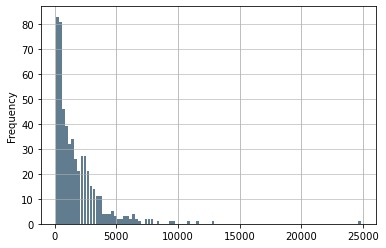

In [15]:
# 看讚數的分佈 y 軸是該讚數的貼文數 來看我們要怎麼取哪個讚數區間資料
commutes = lee_post['like_count']
commutes.plot.hist(grid=True, bins=100, rwidth=0.9,
color='#607c8e')
plt.grid(axis='y', alpha=0.75)

In [16]:
temp = lee_post[(lee_post['like_count'] <= 5000) & (lee_post['like_count'] > 1000)] #讚數大於500 小於1000才取 : 201  篇文章
temp

,new_date,message,jieba_results,like_count
237,2019-10-27,接連兩天都是適合嫁娶的好日子！成家的喜悅更是特別有感染力！\n\n祝福新人幸福滿滿，執手偕老。祝福雙方主婚人家庭幸福，瓜瓞綿綿！來參加婚禮的賓客身體健康，萬事如意！\n\n#不知不覺就說了一串賀詞\n#想婚了嗎\n#成家的喜悅,接連 兩天 都 是 適合 嫁娶 的 好日子 成家 的 喜悅 更是 特別 有 感染力 祝福 新人 幸福 滿滿 執手 偕老 祝福 雙方 主婚人 家庭幸福 瓜 瓞 綿綿 來 參加 婚禮 的 賓客 身體 健康 萬事 如意 不知 不覺 就 說 了 一串 賀詞 想婚 了 嗎 成家 的 喜悅,1009
238,2019-08-23,大法官心中只有黨意沒有憲法 ，八二三紀念日踐踏中華民國。\n\n很遺憾這次有關於年金改革的釋憲案基本上仍宣告合憲。對於民進黨挾著行政、立法、司法的優勢下，恣意欺壓軍公教人員的作法，感到遺憾。從由林萬億主導的年金改革委員會開始，就抱持著對於軍公教人員強烈的敵意，進到立法院後更是挾著立委人數優勢強行通過，現在就連本應該是憲政秩序最後一道防線的大法官都屈服於總統意志，拋棄專業考量而宣告年金改革合憲。隨著民進黨不斷破壞憲政秩序，從侵蝕獨立機關的獨立性、到侵害新聞自由、言論自由等等作法，就預見到遲早會將黑手伸入司法體系，果然在年金改革釋憲案中暴露無疑，今天這三個釋憲案不僅僅代表年金改革釋憲案的失敗，更代表著大法官已經淪為執政黨的木偶，成為民進黨擦脂抹粉的工具，視中華民國憲法如無物。\n\n解釋文中少數的亮點，是宣告退休軍公教再任私校停領退休俸部分違憲。\n\n我在年改審查過程中有接到部分退休軍人現正擔任教師的陳情函，退休時可能才四十歲左右，小孩還在念書經濟壓力最大的時候被迫退休，所以退休後勢必要尋找另一份工作，而有些人選擇進修後擔任私立學校教師。但民進黨黨團卻堅持要停發退休俸，對於終身為國服務的軍人而言情何以堪，退休俸是對軍人過去辛勞的肯定，跟退休後從事何種行業並沒有關聯性。這部分我在年金改革審查時就有不斷呼籲這種設計有問題，私立學校與民間企業並沒有本質上的不同，故而特別限制退休軍公教再任私立學校教師而停發退休俸的設計根本就是違憲。\n\n回顧民進黨過去執政的這幾年，操作世代對立、操作職業別對立，撕裂人民間的情感，造成弱弱相殘、國家嚴重對立動盪。這些惡行之一，就是年金改革。如此躁進的年改就是以選票為優先考量，而不是謀求國家安定與各式年金制度的永續經營！民進黨主導之下的年金改革，只是操作社會對立獲取選票的工具，從世代對立到職業對立，不斷撕裂台灣社會，台灣就在民進黨不斷的選舉操作下停滯不前，對立情緒不斷升高，無論在職或退休人員都是社會一份子，只有彼此團結才能夠帶來進步，只會操作族群對立的政黨勢必被淘汰，中華民國是國家體制認同的最大公約數，中華民國憲法也不容許恣意踐踏。\n\n細數年改審議過程，我都擔任著國民黨黨團幹部，更是在國防外交委員會與軍人站在一起守護合憲的改革，挑燈夜戰參與每一次的審查協商表決，因為我衷心認為軍公教一輩子為國家的付出奉獻不能被遺忘！\n\n對於今天大法官指明違憲及督促相關機關檢討的地方，我依然會繼續捍衛退休軍公教的尊嚴，扭轉違憲惡法！,大法官 心中 只有 黨意 沒有 憲法 八二三 紀念 日 踐踏 中華民國 很 遺憾 這次 有關 於 年金改革 的 釋憲案 基本上 仍 宣告 合憲 對 於 民進黨 挾著 行政 立法 司法 的 優勢 下 恣意 欺壓 軍 公教 人員 的 作法 感到 遺憾 從由林 萬 億主導 的 年金改革 委員 會 開始 就 抱持 著 對 於 軍 公教 人員 強烈 的 敵意 進到 立法院 後 更是 挾著 立委 人數 優勢 強行 通過 現在 就 連本 應該 是 憲政 秩序 最 後 一道 防線 的 大法官 都 屈服 於 總統 意志 拋棄 專業 考量 而 宣告 年金改革 合憲 隨著 民進黨 不斷 破壞 憲政 秩序 從 侵蝕 獨立 機關 的 獨立性 到 侵害 新聞 自由 言論 自由 等等 作法 就 預見 到 遲 早會將 黑手 伸入 司法體系 果然 在 年金改革 釋憲案 中 暴露 無疑 今天 這三個 釋憲案 不僅僅 代表 年金改革 釋憲案 的 失敗 更 代表 著 大法官 已經 淪為 執政黨 的 木偶 成為 民進黨 擦脂抹粉 的 工具 視 中華民國 憲法 如無物 解釋 文中 少數 的 亮點 是 宣告 退休 軍 公教 再任 私校 停領 退休 俸 部分 違憲 我 在 年 改 審查 過程 中 有 接到 部分 退休 軍人現 正 擔任 教師 的 陳 情函 退休 時 可能 才 四十 歲 左右 小孩 還在念書 經濟 壓力 最大 的 時候 被迫 退休 所以 退休 後 勢 必要 尋找 另 一份 工作 而 有些 人選擇 進修 後 擔任 私立 學校 教師 但 民進黨 黨團 卻 堅持 要 停發 退休 俸 對 於 終身 為國 服務 的 軍人 而言 情 何以堪 退休 俸 是 對 軍人過 去 辛勞 的 肯定 跟 退休 後 從 事 何種 行業 並沒有 關聯性 這 部分 我 在 年金改革 審查 時 就 有 不斷 呼籲 這種 設計 有 問題 私立 學校 與 民間 企業 並沒有 本質 上 的 不同 故而 特別 限制 退休 軍 公教 再任 私立 學校 教師 而 停發 退休 俸 的 設計 根本就是 違憲 回顧 民進黨 過去 執政 的 這幾年 操作 世代 對立 操作 職業別 對立 撕裂 人民 間 的 情感 造成 弱弱 相殘 國家 嚴重 對 立動盪 這些 惡行 之一 就是 年金改革 如此 躁進 的 年 改 就是 以選票 為 優先 考量 而 不是 謀求 國家 安定 與 各式 年金制度 的 永續 經營 民進黨 主導 之下 的 年金改革 只是 操作 社會 對立 獲取 選票 的 工具 從 世代 對立 到 職業 對立 不斷 撕裂 台灣 社會 台灣 就 在 民進黨 不斷 的 選舉 操作 下 停滯 不前 對立 情緒 不斷 升高 無論 在 職 或 退休 人員 都 是 社會 一份 子 只有 彼此 團結 才能 夠帶 來 進步 只會 操作 族群 對立 的 政黨勢 必 被 淘汰 中華民國 是 國家 體制 認同 的 最大公約數 中華民國 憲法 也 不容 許 恣意 踐踏 細數 年 改審議 過程 我 都 擔任 著 國民黨 黨團 幹部 更是 在 國防 外交 委員 會 與 軍人 站 在 一起 守護 合憲 的 改革 挑燈 夜戰 參與 每 一次 的 審查 協商表決 因為 我 衷心 認為 軍 公教 一輩子 為 國家 的 付出 奉獻 不能 被 遺忘 對 於 今天 大法官 指明 違憲及 督促 相關 機關 檢討 的 地方 我 依然 會 繼續 捍衛 退休 軍 公教 的 尊嚴 扭轉 違憲惡法,1012
239,2019-09-16,,,1017
240,2019-09-08,這三天是滿滿的中秋節行程，\n助理說他又發生照片選擇困難症了！\n\n那就剪成影片吧！\n\n把中秋節當理由，讓我們的心緊緊相連！\n\n#點看影片看看你有沒在裡面\n#中秋節快樂\n#繼續跑行程ing,這 三天 是 滿滿 的 中秋節 行程 助理 說 他 又 發生 照片 選擇 困難症 了 那 就 剪成 影片 吧 把 中秋 節當 理由 讓 我們 的 心 緊緊 相連 點看 影片 看看 你 有 沒 在 裡面 中秋節 快樂 繼續 跑行程,1019
241,2019-01-07,音樂請下！\n\n我的青春，也不是沒傷痕......\n\n#進錯歌了嗎 #青春片 #影片請進\n#太震驚了重新貼文 \n\n柯志恩 會不會太美！\n立法委員 林麗蟬 完全逆天啊！,音樂 請 下 我 的 青春 也 不是 沒傷 痕 進錯 歌 了 嗎 青春片 影片 請進 太震 驚 了 重新 貼文 柯志恩 會不會 太美 立法委員 林麗蟬 完全 逆天 啊,1020
...,...,...,...,...
503,2019-06-01,#一起贏回中華民國\n\n團結一致，讓國民黨重返執政，再現藍天。,一起 贏回 中華民國 團結 一致 讓 國民黨 重返 執政 再現 藍天,4771
504,2019-06-07,祝福大家，佳節愉快！\n闔家平安，萬事順心！\n\n#先來顆粽子吧\n#南部粽北部粽潮州粽都是好粽,祝福 大家 佳節 愉快 闔 家 平安 萬事 順心 先來顆 粽子 吧 南部 粽 北部 粽 潮州 粽都 是 好 粽,4792
505,2019-12-23,拜票遇到小寶貝們，立馬療癒，元氣滿滿！\n\n#開心長大喲\n#0到6歲國家顧,拜票 遇到 小寶貝們 立馬療 癒 元氣 滿滿 開心長 大喲 到 歲 國家 顧,4854
506,2019-11-19,您看過了嗎？\n\n前天總部成立開場前，除了首支形象影片，更是這支夥伴相挺的推薦影片的首映！\n\n立法院的三年多時間，是我快速成長學習的三年，一路走來靠著立法院的戰友，一起努力，攜手前行！除了同事情誼，更多革命情感！國會是團隊作戰，感謝立院戰友的推薦，未來我們繼續攜手努力！\n\n我們都是中華民國派！\n\n#柯志恩\n#王育敏\n#江啟臣\n#李永萍\n#顏寬恒\n#林德福\n#蔣萬安\n#許淑華,您 看過 了 嗎 前天 總部 成立 開場 前 除了 首支 形象 影片 更是 這支 夥伴 相挺 的 推薦 影片 的 首映 立法院 的 三年 多時間 是 我 快速 成長 學習 的 三年 一路 走來 靠 著 立法院 的 戰友 一起 努力 攜手 前行 除了 同 事情 誼 更 多 革命 情感 國會 是 團隊 作戰 感謝 立院 戰友

TF-IDF
我們把剛才斷好詞的貼文，轉成list形式，全部放到corpus變數裡面，方便做tf-idf處理。

CountVectorizer算字頻（搭配fit_transform）
TfidfTransformer計算TFIDF

In [17]:
corpus = temp['jieba_results'].values.tolist() #如果不做這個、結果會不同 太generall

In [18]:
# TF-IDF
# coding:utf-8  

#算字頻
from sklearn.feature_extraction.text import CountVectorizer  
vectorizer = CountVectorizer()  # 計算單字出現在文件中的次數
X = vectorizer.fit_transform(corpus) #  input must be a list, return a matrix (#of corpus) x (# of word) # 201 x 4835
word = vectorizer.get_feature_names() # column name which is the word
message_column = word

#計算TFIDF
from sklearn.feature_extraction.text import TfidfTransformer  # 計算tfidf
transformer = TfidfTransformer()  
tfidf = transformer.fit_transform(X) # X : corpus x word matrix, output:201 x 4835

In [19]:
tfidf_view = pd.DataFrame(tfidf.toarray(), columns = vectorizer.get_feature_names())
tfidf_view

,一下,一串,一事,一些,一份,一休,一位,一併,一例,一個,...,鼓勵,鼻咽,鼻子,鼻炎,齊心,齊聚,齡常規,龍門,龐大,龔睿
0,0.0,0.176123,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.074995,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
267,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
268,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
269,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
# #使用LDA演算法
from sklearn.decomposition import LatentDirichletAllocation
LDA = LatentDirichletAllocation(n_components=6, random_state=None)
LDA.fit(X) # 用countrvectorizer() result 去fit 

topic_message = list()
#觀看結果
for i,topic in enumerate(LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    mes_topic = [vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]]
    print(mes_topic)
    for i in mes_topic:
        topic_message.append(i)

TOP 10 WORDS PER TOPIC #0
['大法官', '台灣', '可以', '國家', '一起', '我們', '今天', '大家', '民進黨', '中華民國']
TOP 10 WORDS PER TOPIC #1
['酒駕', '自己', '總統', '支持', '彥秀', '謝謝', '可以', '繼續', '大家', '一起']
TOP 10 WORDS PER TOPIC #2
['重建', '教師', '我們', '安全', '問題', '政府', '應該', '危老', '相關', '條例']
TOP 10 WORDS PER TOPIC #3
['發展', '長照', '南港', '可以', '港湖', '彥秀', '未來', '台灣', '產業', '我們']
TOP 10 WORDS PER TOPIC #4
['課綱', '可以', '今天', '中華民國', '彥秀', '繼續', '醫療', '大家', '我們', '一起']
TOP 10 WORDS PER TOPIC #5
['大家', '我們', '發生', '環境', '因此', '問題', '教育', '如何', '家長', '孩子']


In [21]:
LDA.fit(tfidf) # 用tfidf result 去fit 

#觀看結果
for i,topic in enumerate(LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    print([vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]])

TOP 10 WORDS PER TOPIC #0
['彥秀', '報稅', '謝謝', '可以', '家長', '我們', '活動', '一起', '大家', '中華民國']
TOP 10 WORDS PER TOPIC #1
['我們', '助理', '媽祖', '咖啡', '教師', '孩子', '大家', '南港', '民進黨', '一起']
TOP 10 WORDS PER TOPIC #2
['大家', '醫療', '專業', '投票', '彥秀', '港湖', '用心', '一直', '二話', '選前']
TOP 10 WORDS PER TOPIC #3
['彥秀', '中心', '一樣', '快樂', '平安', '繼續', '今天', '我們', '一起', '大家']
TOP 10 WORDS PER TOPIC #4
['我會', '加油', '市場', '一起', '立委', '課綱', '謝謝', '努力', '繼續', '大家']
TOP 10 WORDS PER TOPIC #5
['一個', '中華民國', '產業', '汐止', '李彥秀', '港湖', '可以', '一起', '我們', '大家']


In [22]:
#政見做斷詞

politics_lee = politics[politics.姓名 == "李彥秀"].政見.to_string()
politics_lee = re.sub(re_punctuation, "", politics_lee)
politics_lee = re.sub(r'[0-9]','',politics_lee)
politics_lee = re.sub(r'[a-zA-Z]','',politics_lee)
politics_lee = re.sub(r'[-<>#。！⋯.➡?=&▶_%♀!❗]','',politics_lee)  # 注意裡面不能有空白！
jieba.load_userdict("dict.txt")
words = jieba.lcut(politics_lee, cut_all = False)


In [23]:
#觀察政見的斷詞結果
inspect_words = jieba.cut(politics_lee, cut_all = False)
text = ''
for word in inspect_words:
    text = text + ' ' + str(word) 
text = re.sub(r'[-<>#。！⋯.➡?=&▶_%♀!❗]','',text)
text = re.sub(re_punctuation, "", text)


In [24]:
# 比較、查看他政見
promise = politics[politics.姓名 == "李彥秀"].政見.to_string()
re.split('。 |：', promise) # skip this, just to make it easier to read

['4    \u3000用心陪你走 大手牽小手 1.強化公托、臨托制度',
 '2.\x07編制儲備教師，成立安親系統，活化校園閒置 空間',
 '3.推動分齡性向輔導機制，擺脫制式教育',
 '4.督促建置輔導人力預防校園霸凌',
 '5.重視食安管理，對黑心業者罰得到、快、重',
 '6.\x07推動「5安幸福在台灣｣照顧新住民',
 '\u3000\u3000\u3000\u3000用心啟動未來，打破低薪魔咒 1.\x07健全十二年國教制度，技職教育科系專業化、 實習生納入勞基法保障',
 '2.改善新鮮人求職環境，增設免費職訓課程',
 '3.調降租屋補助門檻、增設青年出租公營住宅',
 '4.興建青年住宅並設托育中心',
 '5.推動微型創業，建立創業導師制',
 '\u3000\u3000\u3000\u3000用心訂製幸福',
 '長期照護、單親扶助 1.確保長期照護保險法通過，建立穩定財源',
 '2.建立長期照護銀行，提供社區照護服務',
 '3.中低收入戶審查精緻化避免一刀式區分',
 '4.推動年金改革',
 '5.建立急難扶助據點',
 '6.協助單親家庭養育、教育困境',
 '\u3000\u3000\u3000\u3000用心呵護 看見港湖新未來 1.加速老舊工業住宅都更，推動都市再造',
 '2.兵工廠、聯勤司令部遷移，拓展南港腹地',
 '3.加速電纜、電塔地下化',
 '4.規劃內湖焚化廠改建為青年住宅',
 '5.結合民間資源保存古蹟',
 '\u3000\u3000\u3000\u3000用心成就港湖，園區回饋鄰里 1.\x07推動內湖科技園區、南港軟體園區提撥補助金 回饋地方',
 '2.\x07尋求策略型產業，提升國際競爭力，強調企業 社會責任',
 '3.\x07勞資團體協商制度化，保障勞工權益',
 '\u3000\u3000\u3000\u3000\x07用心打造 南港東區新門戶，內湖科技智 慧城 1.力拚民生汐止線106年動工',
 '2.捷運南北線重新啟動',
 '3.興建信義線東延至研究院路二段',
 '4.加速高鐵南港站通車，台鐵南港站升級',
 '5.通盤檢討松山機場存廢。']

In [25]:
# 政見做tfidf
p_vectorizer = CountVectorizer()  
p_X = p_vectorizer.fit_transform(words)  
word = p_vectorizer.get_feature_names() 
p_transformer = TfidfTransformer()  
p_tfidf = p_transformer.fit_transform(p_X) #143 word in 

p_LDA = LatentDirichletAllocation(n_components=8, random_state=None)

#政見做LDA
p_LDA.fit(p_tfidf)
topic_politics = list()
#觀看結果
for i,topic in enumerate(p_LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    topic_p = [p_vectorizer.get_feature_names()[index] for index in topic.argsort()[-8:]]
    print(topic_p)
    for i in topic_p:
        topic_politics.append(i)

TOP 10 WORDS PER TOPIC #0
['捷運', '社會責任', '工業', '低薪魔咒', '服務', '拓展', '腹地', '增設']
TOP 10 WORDS PER TOPIC #1
['規劃', '專業化', '園區', '國際競爭力', '老舊', '回饋', '預防', '啟動']
TOP 10 WORDS PER TOPIC #2
['聯勤', '一刀式區分', '尋求', '看見', '扶助', '技職教育', '保障', '推動']
TOP 10 WORDS PER TOPIC #3
['實習', '輔導人力', '活化', '校園霸凌', '地下', '高鐵', '建立', '南港']
TOP 10 WORDS PER TOPIC #4
['創業導', '出租', '松山機場', '回饋地方', '避免', '內湖焚化廠', '青年住宅', '未來']
TOP 10 WORDS PER TOPIC #5
['審查', '大手', '重視', '長期照護', '單親', '公托', '困境', '用心']
TOP 10 WORDS PER TOPIC #6
['安親系統', '新鮮人', '改善', '湖新', '得到', '單親家庭', '成就', '並設']
TOP 10 WORDS PER TOPIC #7
['提升', '中低收入戶', '研究院', '微型創業', '校園', '幸福', '興建', '加速']


In [26]:
# #政見所有topic 總表
for i in topic_politics:
#for i in topic_:# 文章內容的topic所有字的總表
    print(i,end = ', ')

捷運, 社會責任, 工業, 低薪魔咒, 服務, 拓展, 腹地, 增設, 規劃, 專業化, 園區, 國際競爭力, 老舊, 回饋, 預防, 啟動, 聯勤, 一刀式區分, 尋求, 看見, 扶助, 技職教育, 保障, 推動, 實習, 輔導人力, 活化, 校園霸凌, 地下, 高鐵, 建立, 南港, 創業導, 出租, 松山機場, 回饋地方, 避免, 內湖焚化廠, 青年住宅, 未來, 審查, 大手, 重視, 長期照護, 單親, 公托, 困境, 用心, 安親系統, 新鮮人, 改善, 湖新, 得到, 單親家庭, 成就, 並設, 提升, 中低收入戶, 研究院, 微型創業, 校園, 幸福, 興建, 加速, 

In [27]:
#在LDA結果中每個Topic政見的詞 、 臉書貼文的詞的交集 
#set(topic_politics).intersection(topic_message) 
Counter(topic_politics+topic_message) #綜合臉書發文、政見 Topic 的詞 看出現次數
#產業升級、園區、高科技園區、加工區 、楠梓、交通、三鐵同構

Counter({'捷運': 1,
         '社會責任': 1,
         '工業': 1,
         '低薪魔咒': 1,
         '服務': 1,
         '拓展': 1,
         '腹地': 1,
         '增設': 1,
         '規劃': 1,
         '專業化': 1,
         '園區': 1,
         '國際競爭力': 1,
         '老舊': 1,
         '回饋': 1,
         '預防': 1,
         '啟動': 1,
         '聯勤': 1,
         '一刀式區分': 1,
         '尋求': 1,
         '看見': 1,
         '扶助': 1,
         '技職教育': 1,
         '保障': 1,
         '推動': 1,
         '實習': 1,
         '輔導人力': 1,
         '活化': 1,
         '校園霸凌': 1,
         '地下': 1,
         '高鐵': 1,
         '建立': 1,
         '南港': 2,
         '創業導': 1,
         '出租': 1,
         '松山機場': 1,
         '回饋地方': 1,
         '避免': 1,
         '內湖焚化廠': 1,
         '青年住宅': 1,
         '未來': 2,
         '審查': 1,
         '大手': 1,
         '重視': 1,
         '長期照護': 1,
         '單親': 1,
         '公托': 1,
         '困境': 1,
         '用心': 1,
         '安親系統': 1,
         '新鮮人': 1,
         '改善': 1,
         '湖新': 1,
         '得到': 1,
         '單親家庭

我們可以用 臉書貼文和政見 Topic word 的交集 會推測
劉世芳的幾個重點
1. 經濟相關的科技 園區和加工區
    - 高科技、發展、產業、加工區、園區、產業、就業、計畫、建設、
2. 楠梓地區
    -楠梓
3. 交通
    -三鐵同構、中油、交通、
4. 環境
    -環境、綠能、

職災 相關tf idf 高 (以下討論臉書貼文)

In [28]:
top_10_message = tfidf_view.sort_values(by = ['教育'], ascending = False).index[:10] # 把高科技tfidf 高的文章做排序取top 10的文章 拿出文章的index
tfidf_view.sort_values(by = ['教育'], ascending = False).head(10)

,一下,一串,一事,一些,一份,一休,一位,一併,一例,一個,...,鼓勵,鼻咽,鼻子,鼻炎,齊心,齊聚,齡常規,龍門,龐大,龔睿
111,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
109,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
30,0.0,0.0,0.0,0.0,0.0,0.0,0.078067,0.000000,0.0,0.049938,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
93,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.051257,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
43,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.047281,0.0,0.000000,...,0.031169,0.0,0.0,0.0,0.0,0.0,0.047281,0.0,0.0,0.0
209,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
136,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.032538,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
248,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.132127,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
206,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
189,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [29]:
#把上面的文章個別拿出文章來看他們文章tfidf值 發現可能在"高科技"的tfidf 和所有文章比較算很高，但是個別這些文章，這些文章還有更可以代表他的term
pd.DataFrame(tfidf_view.iloc[43,]).sort_values(by = 43, ascending=False)
#pd.DataFrame(tfidf_view.iloc[65,]).sort_values(by = 65, ascending=False)
# bad attemption

,43
身心障礙,0.472814
育兒,0.292170
領取,0.283688
津貼,0.264234
補助,0.235544
...,...
小心,0.000000
小弟,0.000000
小寶貝去,0.000000
小寶貝們,0.000000


In [30]:
top_10_message = tfidf_view.sort_values(by = ['韓國瑜'], ascending = False).index[:10] # 把高科技tfidf 高的文章做排序取top 10的文章 拿出文章的index
tfidf_view.sort_values(by = ['韓國瑜'], ascending = False).head(10)

,一下,一串,一事,一些,一份,一休,一位,一併,一例,一個,...,鼓勵,鼻咽,鼻子,鼻炎,齊心,齊聚,齡常規,龍門,龐大,龔睿
53,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.068555,0.0,0.0,0.0,0.0,0.0
159,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
264,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.092324,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
41,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
120,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.000000,0.118702,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
245,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
86,0.0,0.0,0.0,0.0,0.0,0.025883,0.000000,0.0,0.025883,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
177,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
176,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [31]:
#把上面的文章個別拿出文章來看他們文章tfidf值 發現可能在"高科技"的tfidf 和所有文章比較算很高，但是個別這些文章，這些文章還有更可以代表他的term
pd.DataFrame(tfidf_view.iloc[159,]).sort_values(by = 159, ascending=False)
#pd.DataFrame(tfidf_view.iloc[65,]).sort_values(by = 65, ascending=False)
# bad attemption

,159
韓國瑜,0.353789
參拜,0.237245
巷底,0.237245
旅來,0.237245
相約,0.237245
...,...
小便,0.000000
小事化,0.000000
導覽,0.000000
導致民眾,0.000000


In [32]:
#把上面的文章個別拿出文章來看他們文章tfidf值 發現可能在"高科技"的tfidf 和所有文章比較算很高，但是個別這些文章，這些文章還有更可以代表他的term
pd.DataFrame(tfidf_view.iloc[53,]).sort_values(by = 53, ascending=False)
#pd.DataFrame(tfidf_view.iloc[65,]).sort_values(by = 65, ascending=False)
# bad attemption

,53
韓國瑜,0.357812
陳明通,0.255416
人民,0.234262
禽獸,0.205666
民進黨,0.189782
...,...
小美,0.000000
小粉,0.000000
小範圍,0.000000
小看,0.000000


In [33]:
#把上面的文章個別拿出文章來看他們文章tfidf值 發現可能在"高科技"的tfidf 和所有文章比較算很高，但是個別這些文章，這些文章還有更可以代表他的term
pd.DataFrame(tfidf_view.iloc[264,]).sort_values(by = 264, ascending=False)
#pd.DataFrame(tfidf_view.iloc[65,]).sort_values(by = 65, ascending=False)
# bad attemption

,264
服務處,0.484591
韓國瑜,0.264345
我到,0.177266
顏逐開,0.177266
接任,0.177266
...,...
小事化,0.000000
導覽,0.000000
導致民眾,0.000000
導致,0.000000


In [34]:
#把上面的文章個別拿出文章來看他們文章tfidf值 發現可能在"高科技"的tfidf 和所有文章比較算很高，但是個別這些文章，這些文章還有更可以代表他的term
pd.DataFrame(tfidf_view.iloc[41,]).sort_values(by = 41, ascending=False)
#pd.DataFrame(tfidf_view.iloc[65,]).sort_values(by = 65, ascending=False)
# bad attemption

,41
男神,0.413680
最美,0.303983
發言人,0.288104
基隆,0.265723
運動,0.249844
...,...
小內閣,0.000000
小便,0.000000
小事化,0.000000
導覽,0.000000


In [35]:
#把上面的文章個別拿出文章來看他們文章tfidf值 發現可能在"高科技"的tfidf 和所有文章比較算很高，但是個別這些文章，這些文章還有更可以代表他的term
pd.DataFrame(tfidf_view.iloc[120,]).sort_values(by = 120, ascending=False)
#pd.DataFrame(tfidf_view.iloc[65,]).sort_values(by = 65, ascending=False)
# bad attemption

,120
三重,0.403743
立法委員,0.325493
韓流,0.283997
明才,0.152453
重力,0.152453
...,...
小便,0.000000
小事化,0.000000
導覽,0.000000
導致民眾,0.000000


In [36]:
#把上面的文章個別拿出文章來看他們文章tfidf值 發現可能在"高科技"的tfidf 和所有文章比較算很高，但是個別這些文章，這些文章還有更可以代表他的term
pd.DataFrame(tfidf_view.iloc[10,]).sort_values(by = 10, ascending=False)
#pd.DataFrame(tfidf_view.iloc[65,]).sort_values(by = 65, ascending=False)
# bad attemption

,10
庶民,0.291581
長期,0.274839
基層,0.246395
團結,0.199274
里長,0.189034
...,...
小學安裝,0.000000
小學學校,0.000000
小孩,0.000000
小天使,0.000000


In [37]:
#把上面的文章個別拿出文章來看他們文章tfidf值 發現可能在"高科技"的tfidf 和所有文章比較算很高，但是個別這些文章，這些文章還有更可以代表他的term
pd.DataFrame(tfidf_view.iloc[245,]).sort_values(by = 245, ascending=False)
#pd.DataFrame(tfidf_view.iloc[65,]).sort_values(by = 65, ascending=False)
# bad attemption

,245
非藍,0.352160
許因,0.352160
一致,0.269592
團結,0.240675
新加坡,0.234774
...,...
小到,0.000000
小冷,0.000000
小公園,0.000000
小內閣,0.000000


In [38]:
#把上面的文章個別拿出文章來看他們文章tfidf值 發現可能在"高科技"的tfidf 和所有文章比較算很高，但是個別這些文章，這些文章還有更可以代表他的term
pd.DataFrame(tfidf_view.iloc[86,]).sort_values(by = 86, ascending=False)
#pd.DataFrame(tfidf_view.iloc[65,]).sort_values(by = 65, ascending=False)
# bad attemption

,86
就業,0.456982
勞工,0.240595
無薪,0.232951
非典型,0.207068
工作,0.202670
...,...
展覽期,0.000000
展覽,0.000000
展示,0.000000
展現,0.000000


In [39]:
#把上面的文章個別拿出文章來看他們文章tfidf值 發現可能在"高科技"的tfidf 和所有文章比較算很高，但是個別這些文章，這些文章還有更可以代表他的term
pd.DataFrame(tfidf_view.iloc[177,]).sort_values(by = 177, ascending=False)
#pd.DataFrame(tfidf_view.iloc[65,]).sort_values(by = 65, ascending=False)
# bad attemption

,177
噹噹,0.361651
貼圖,0.336851
港湖,0.188356
元素,0.180826
回家吧,0.180826
...,...
小便,0.000000
小事化,0.000000
導覽,0.000000
導致民眾,0.000000


In [40]:
#把上面的文章個別拿出文章來看他們文章tfidf值 發現可能在"高科技"的tfidf 和所有文章比較算很高，但是個別這些文章，這些文章還有更可以代表他的term
pd.DataFrame(tfidf_view.iloc[176,]).sort_values(by = 176, ascending=False)
#pd.DataFrame(tfidf_view.iloc[65,]).sort_values(by = 65, ascending=False)
# bad attemption

,176
院長,0.407212
一同,0.328290
一元,0.230645
發送,0.230645
心想事成,0.230645
...,...
小便,0.000000
小事化,0.000000
導覽,0.000000
導致民眾,0.000000


In [41]:
#這些都是讚數很高的文章 每篇文章最高的tfidf 詞
message_newtfidf = tfidf_view
message_newtfidf['term'] = message_newtfidf[message_column].idxmax(axis = 1)
message_newtfidf['term'].tail(20) # 在這邊的話看讚數最多的文章他們tfidf 最高的詞是什麼

251     柱姐
252     祝福
253     名人
254     生日
255    生活圈
256     危老
257     燒燒
258     取代
259     獎勵
260     一歲
261     一碗
262     修剪
263     奮鬥
264    服務處
265    康乃馨
266     藍天
267    先來顆
268     大喲
269     戰友
270     七海
Name: term, dtype: object

In [42]:
#假如以剛剛科學園區相關主題為例 想看tfidf 最高的詞是科學園區的文章
message_newtfidf[message_newtfidf['term']=="民進黨"]

,一下,一串,一事,一些,一份,一休,一位,一併,一例,一個,...,鼻咽,鼻子,鼻炎,齊心,齊聚,齡常規,龍門,龐大,龔睿,term
59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,民進黨


In [43]:
# 會發現文章出現tfidf是產業的很少，很正常 因為出現太多反而tfidf不會高！
temp.iloc[59,]

new_date                                                                                                                                                                                                                                                                                                                                                                                                                                  2019-08-15
message                                                                                                              #metoo\n\n今年，全世界都在高喊「me too」的反性騷擾運動；當時蔡英文總統曾經說：「力挺女性應勇敢站出來說不，也呼籲男性要多體會女性感受」，但我們的外交官卻替中華民國「考了張0分的考卷」，讓台灣在這股全世界潮流中「被死當」，讓台灣在國際顏面盡失！\n\n造成今天專業人員不專業，技術人員沒技術的罪魁禍首就是民進黨政府，因為民進黨罔顧專業，提拔的不是緊抱民進黨大腿的，就是民進黨「誰誰誰的誰誰誰」，讓這些「綠友友們」佔據高位，政治凌駕專業，才讓整個政府機器陷入這樣的窘境之中。\n\n回顧這三年半蔡政府的執政，文官體制已經不是用螺絲鬆了可以形容。從私菸案到性騷擾，民進黨的不是包庇就是官官相護，未來，這每一筆帳都算在民進黨頭上！
jieba_results       今年 全世界 都 在 高喊   的 反性 騷擾 運動 當時 蔡英文 總統 曾經 說 力挺 女性 應 勇敢 站 出來 說 不 也 呼籲 男性 要 多 體會 女性 感受 但 我們 的 外交官 卻 替 中華民國 考 了

來看楠梓 ： 在臉書發文的topic中topic2,4,7 出現很多次楠梓 

In [44]:
message_newtfidf[message_newtfidf['term']=="中國"]

,一下,一串,一事,一些,一份,一休,一位,一併,一例,一個,...,鼻咽,鼻子,鼻炎,齊心,齊聚,齡常規,龍門,龐大,龔睿,term


In [45]:
temp.iloc[25,]

new_date                                                                                                                                                                                                         2019-08-23
message                                                  秀秀故事屋，明天照常說故事唷！\n\n白鹿颱風南偏快走，台北沒有在警戒區域內，所以明天蚱蜢葛格跟螞蟻兄弟照樣會在西湖區民活動中心，陪伴大朋友小朋友一起過週末！\n\n歡迎大家搭捷運來看表演，一起集氣把颱風趕走！\n\n可能還是有零星降雨，大家要記得帶雨具唷！\n\n#西湖區民活動中心\n#秀秀故事屋\n#愛Party的蚱蜢
jieba_results     秀秀 故事 屋 明天 照常 說 故事 唷 白鹿 颱 風南 偏快 走 台北 沒有 在 警戒 區域 內 所以 明天 蚱蜢 葛格 跟 螞蟻 兄弟 照樣 會 在 西湖 區民 活動 中心 陪伴 大 朋友 小朋友 一起 過週末 歡迎 大家 搭 捷運 來 看 表演 一起 集氣 把 颱 風 趕 走 可能 還是 有 零星 降雨 大家 要 記得 帶 雨具 唷  西湖 區民 活動 中心  秀秀 故事 屋  愛  的 蚱蜢
like_count                                                                                                                                                                                                             1211
Name: 262, dtype: object

In [46]:
# LDA : 看每篇文章被分配在哪些主題  (tfidf)
#review topic 結果
for i,topic in enumerate(LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    print([vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]])

TOP 10 WORDS PER TOPIC #0
['彥秀', '報稅', '謝謝', '可以', '家長', '我們', '活動', '一起', '大家', '中華民國']
TOP 10 WORDS PER TOPIC #1
['我們', '助理', '媽祖', '咖啡', '教師', '孩子', '大家', '南港', '民進黨', '一起']
TOP 10 WORDS PER TOPIC #2
['大家', '醫療', '專業', '投票', '彥秀', '港湖', '用心', '一直', '二話', '選前']
TOP 10 WORDS PER TOPIC #3
['彥秀', '中心', '一樣', '快樂', '平安', '繼續', '今天', '我們', '一起', '大家']
TOP 10 WORDS PER TOPIC #4
['我會', '加油', '市場', '一起', '立委', '課綱', '謝謝', '努力', '繼續', '大家']
TOP 10 WORDS PER TOPIC #5
['一個', '中華民國', '產業', '汐止', '李彥秀', '港湖', '可以', '一起', '我們', '大家']


In [47]:
#可以猜猜看第一篇文是哪個topic 
temp.iloc[:,[0,2]]

,new_date,jieba_results
237,2019-10-27,接連 兩天 都 是 適合 嫁娶 的 好日子 成家 的 喜悅 更是 特別 有 感染力 祝福 新人 幸福 滿滿 執手 偕老 祝福 雙方 主婚人 家庭幸福 瓜 瓞 綿綿 來 參加 婚禮 的 賓客 身體 健康 萬事 如意 不知 不覺 就 說 了 一串 賀詞 想婚 了 嗎 成家 的 喜悅
238,2019-08-23,大法官 心中 只有 黨意 沒有 憲法 八二三 紀念 日 踐踏 中華民國 很 遺憾 這次 有關 於 年金改革 的 釋憲案 基本上 仍 宣告 合憲 對 於 民進黨 挾著 行政 立法 司法 的 優勢 下 恣意 欺壓 軍 公教 人員 的 作法 感到 遺憾 從由林 萬 億主導 的 年金改革 委員 會 開始 就 抱持 著 對 於 軍 公教 人員 強烈 的 敵意 進到 立法院 後 更是 挾著 立委 人數 優勢 強行 通過 現在 就 連本 應該 是 憲政 秩序 最 後 一道 防線 的 大法官 都 屈服 於 總統 意志 拋棄 專業 考量 而 宣告 年金改革 合憲 隨著 民進黨 不斷 破壞 憲政 秩序 從 侵蝕 獨立 機關 的 獨立性 到 侵害 新聞 自由 言論 自由 等等 作法 就 預見 到 遲 早會將 黑手 伸入 司法體系 果然 在 年金改革 釋憲案 中 暴露 無疑 今天 這三個 釋憲案 不僅僅 代表 年金改革 釋憲案 的 失敗 更 代表 著 大法官 已經 淪為 執政黨 的 木偶 成為 民進黨 擦脂抹粉 的 工具 視 中華民國 憲法 如無物 解釋 文中 少數 的 亮點 是 宣告 退休 軍 公教 再任 私校 停領 退休 俸 部分 違憲 我 在 年 改 審查 過程 中 有 接到 部分 退休 軍人現 正 擔任 教師 的 陳 情函 退休 時 可能 才 四十 歲 左右 小孩 還在念書 經濟 壓力 最大 的 時候 被迫 退休 所以 退休 後 勢 必要 尋找 另 一份 工作 而 有些 人選擇 進修 後 擔任 私立 學校 教師 但 民進黨 黨團 卻 堅持 要 停發 退休 俸 對 於 終身 為國 服務 的 軍人 而言 情 何以堪 退休 俸 是 對 軍人過 去 辛勞 的 肯定 跟 退休 後 從 事 何種 行業 並沒有 關聯性 這 部分 我 在 年金改革 審查 時 就 有 不斷 呼籲 這種 設計 有 問題 私立 學校 與 民間 企業 並沒有 本質 上 的 不同 故而 特別 限制 退休 軍 公教 再任 私立 學校 教師 而 停發 退休 俸 的 設計 根本就是 違憲 回顧 民進黨 過去 執政 的 這幾年 操作 世代 對立 操作 職業別 對立 撕裂 人民 間 的 情感 造成 弱弱 相殘 國家 嚴重 對 立動盪 這些 惡行 之一 就是 年金改革 如此 躁進 的 年 改 就是 以選票 為 優先 考量 而 不是 謀求 國家 安定 與 各式 年金制度 的 永續 經營 民進黨 主導 之下 的 年金改革 只是 操作 社會 對立 獲取 選票 的 工具 從 世代 對立 到 職業 對立 不斷 撕裂 台灣 社會 台灣 就 在 民進黨 不斷 的 選舉 操作 下 停滯 不前 對立 情緒 不斷 升高 無論 在 職 或 退休 人員 都 是 社會 一份 子 只有 彼此 團結 才能 夠帶 來 進步 只會 操作 族群 對立 的 政黨勢 必 被 淘汰 中華民國 是 國家 體制 認同 的 最大公約數 中華民國 憲法 也 不容 許 恣意 踐踏 細數 年 改審議 過程 我 都 擔任 著 國民黨 黨團 幹部 更是 在 國防 外交 委員 會 與 軍人 站 在 一起 守護 合憲 的 改革 挑燈 夜戰 參與 每 一次 的 審查 協商表決 因為 我 衷心 認為 軍 公教 一輩子 為 國家 的 付出 奉獻 不能 被 遺忘 對 於 今天 大法官 指明 違憲及 督促 相關 機關 檢討 的 地方 我 依然 會 繼續 捍衛 退休 軍 公教 的 尊嚴 扭轉 違憲惡法
239,2019-09-16,
240,2019-09-08,這 三天 是 滿滿 的 中秋節 行程 助理 說 他 又 發生 照片 選擇 困難症 了 那 就 剪成 影片 吧 把 中秋 節當 理由 讓 我們 的 心 緊緊 相連 點看 影片 看看 你 有 沒 在 裡面 中秋節 快樂 繼續 跑行程
241,2019-01-07,音樂 請 下 我 的 青春 也 不是 沒傷 痕 進錯 歌 了 嗎 青春片 影片 請進 太震 驚 了 重新 貼文 柯志恩 會不會 太美 立法委員 林麗蟬 完全 逆天 啊
...,...,...
503,2019-06-01,一起 贏回 中華民國 團結 一致 讓 國民黨 重返 執政 再現 藍天
504,2019-06-07,祝福 大家 佳節 愉快 闔 家 平安 萬事 順心 先來顆 粽子 吧 南部 粽 北部 粽 潮州 粽都 是 好 粽
505,2019-12-23,拜票 遇到 小寶貝們 立馬療 癒 元氣 滿滿 開心長 大喲 到 歲 國家 顧
506,2019-11-19,您 看過 了 嗎 前天 總部 成立 開場 前 除了 首支 形象 影片 更是 這支 夥伴 相挺 的 推薦 影片 的 首映 立法院 的 三年 多時間 是 我 快速 成長 學習 的 三年 一路 走來 靠 著 立法院 的 戰友 一起 努力 攜手 前行 除了 同 事情 誼 更 多 革命 情感 國會 是 團隊 作戰 感謝 立院 戰友 的 推薦 未來 我們 繼續 攜手 努力 我們 都 是 中華民國 派 柯志恩 王育敏 江啟臣 李永萍 顏寬恒 林 德福 蔣萬安 許淑華


In [48]:
#LDA classification 
temp["topic"]=""#add new column 

doc_topic = LDA.transform(tfidf)
for n in range(doc_topic.shape[0]):
    topic_most_pr = doc_topic[n].argmax()

    temp.iloc[n,4] = topic_most_pr
temp

<ipython-input-48-3dbfd841bfcf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["topic"]=""#add new column
C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,new_date,message,jieba_results,like_count,topic
237,2019-10-27,接連兩天都是適合嫁娶的好日子！成家的喜悅更是特別有感染力！\n\n祝福新人幸福滿滿，執手偕老。祝福雙方主婚人家庭幸福，瓜瓞綿綿！來參加婚禮的賓客身體健康，萬事如意！\n\n#不知不覺就說了一串賀詞\n#想婚了嗎\n#成家的喜悅,接連 兩天 都 是 適合 嫁娶 的 好日子 成家 的 喜悅 更是 特別 有 感染力 祝福 新人 幸福 滿滿 執手 偕老 祝福 雙方 主婚人 家庭幸福 瓜 瓞 綿綿 來 參加 婚禮 的 賓客 身體 健康 萬事 如意 不知 不覺 就 說 了 一串 賀詞 想婚 了 嗎 成家 的 喜悅,1009,0
238,2019-08-23,大法官心中只有黨意沒有憲法 ，八二三紀念日踐踏中華民國。\n\n很遺憾這次有關於年金改革的釋憲案基本上仍宣告合憲。對於民進黨挾著行政、立法、司法的優勢下，恣意欺壓軍公教人員的作法，感到遺憾。從由林萬億主導的年金改革委員會開始，就抱持著對於軍公教人員強烈的敵意，進到立法院後更是挾著立委人數優勢強行通過，現在就連本應該是憲政秩序最後一道防線的大法官都屈服於總統意志，拋棄專業考量而宣告年金改革合憲。隨著民進黨不斷破壞憲政秩序，從侵蝕獨立機關的獨立性、到侵害新聞自由、言論自由等等作法，就預見到遲早會將黑手伸入司法體系，果然在年金改革釋憲案中暴露無疑，今天這三個釋憲案不僅僅代表年金改革釋憲案的失敗，更代表著大法官已經淪為執政黨的木偶，成為民進黨擦脂抹粉的工具，視中華民國憲法如無物。\n\n解釋文中少數的亮點，是宣告退休軍公教再任私校停領退休俸部分違憲。\n\n我在年改審查過程中有接到部分退休軍人現正擔任教師的陳情函，退休時可能才四十歲左右，小孩還在念書經濟壓力最大的時候被迫退休，所以退休後勢必要尋找另一份工作，而有些人選擇進修後擔任私立學校教師。但民進黨黨團卻堅持要停發退休俸，對於終身為國服務的軍人而言情何以堪，退休俸是對軍人過去辛勞的肯定，跟退休後從事何種行業並沒有關聯性。這部分我在年金改革審查時就有不斷呼籲這種設計有問題，私立學校與民間企業並沒有本質上的不同，故而特別限制退休軍公教再任私立學校教師而停發退休俸的設計根本就是違憲。\n\n回顧民進黨過去執政的這幾年，操作世代對立、操作職業別對立，撕裂人民間的情感，造成弱弱相殘、國家嚴重對立動盪。這些惡行之一，就是年金改革。如此躁進的年改就是以選票為優先考量，而不是謀求國家安定與各式年金制度的永續經營！民進黨主導之下的年金改革，只是操作社會對立獲取選票的工具，從世代對立到職業對立，不斷撕裂台灣社會，台灣就在民進黨不斷的選舉操作下停滯不前，對立情緒不斷升高，無論在職或退休人員都是社會一份子，只有彼此團結才能夠帶來進步，只會操作族群對立的政黨勢必被淘汰，中華民國是國家體制認同的最大公約數，中華民國憲法也不容許恣意踐踏。\n\n細數年改審議過程，我都擔任著國民黨黨團幹部，更是在國防外交委員會與軍人站在一起守護合憲的改革，挑燈夜戰參與每一次的審查協商表決，因為我衷心認為軍公教一輩子為國家的付出奉獻不能被遺忘！\n\n對於今天大法官指明違憲及督促相關機關檢討的地方，我依然會繼續捍衛退休軍公教的尊嚴，扭轉違憲惡法！,大法官 心中 只有 黨意 沒有 憲法 八二三 紀念 日 踐踏 中華民國 很 遺憾 這次 有關 於 年金改革 的 釋憲案 基本上 仍 宣告 合憲 對 於 民進黨 挾著 行政 立法 司法 的 優勢 下 恣意 欺壓 軍 公教 人員 的 作法 感到 遺憾 從由林 萬 億主導 的 年金改革 委員 會 開始 就 抱持 著 對 於 軍 公教 人員 強烈 的 敵意 進到 立法院 後 更是 挾著 立委 人數 優勢 強行 通過 現在 就 連本 應該 是 憲政 秩序 最 後 一道 防線 的 大法官 都 屈服 於 總統 意志 拋棄 專業 考量 而 宣告 年金改革 合憲 隨著 民進黨 不斷 破壞 憲政 秩序 從 侵蝕 獨立 機關 的 獨立性 到 侵害 新聞 自由 言論 自由 等等 作法 就 預見 到 遲 早會將 黑手 伸入 司法體系 果然 在 年金改革 釋憲案 中 暴露 無疑 今天 這三個 釋憲案 不僅僅 代表 年金改革 釋憲案 的 失敗 更 代表 著 大法官 已經 淪為 執政黨 的 木偶 成為 民進黨 擦脂抹粉 的 工具 視 中華民國 憲法 如無物 解釋 文中 少數 的 亮點 是 宣告 退休 軍 公教 再任 私校 停領 退休 俸 部分 違憲 我 在 年 改 審查 過程 中 有 接到 部分 退休 軍人現 正 擔任 教師 的 陳 情函 退休 時 可能 才 四十 歲 左右 小孩 還在念書 經濟 壓力 最大 的 時候 被迫 退休 所以 退休 後 勢 必要 尋找 另 一份 工作 而 有些 人選擇 進修 後 擔任 私立 學校 教師 但 民進黨 黨團 卻 堅持 要 停發 退休 俸 對 於 終身 為國 服務 的 軍人 而言 情 何以堪 退休 俸 是 對 軍人過 去 辛勞 的 肯定 跟 退休 後 從 事 何種 行業 並沒有 關聯性 這 部分 我 在 年金改革 審查 時 就 有 不斷 呼籲 這種 設計 有 問題 私立 學校 與 民間 企業 並沒有 本質 上 的 不同 故而 特別 限制 退休 軍 公教 再任 私立 學校 教師 而 停發 退休 俸 的 設計 根本就是 違憲 回顧 民進黨 過去 執政 的 這幾年 操作 世代 對立 操作 職業別 對立 撕裂 人民 間 的 情感 造成 弱弱 相殘 國家 嚴重 對 立動盪 這些 惡行 之一 就是 年金改革 如此 躁進 的 年 改 就是 以選票 為 優先 考量 而 不是 謀求 國家 安定 與 各式 年金制度 的 永續 經營 民進黨 主導 之下 的 年金改革 只是 操作 社會 對立 獲取 選票 的 工具 從 世代 對立 到 職業 對立 不斷 撕裂 台灣 社會 台灣 就 在 民進黨 不斷 的 選舉 操作 下 停滯 不前 對立 情緒 不斷 升高 無論 在 職 或 退休 人員 都 是 社會 一份 子 只有 彼此 團結 才能 夠帶 來 進步 只會 操作 族群 對立 的 政黨勢 必 被 淘汰 中華民國 是 國家 體制 認同 的 最大公約數 中華民國 憲法 也 不容 許 恣意 踐踏 細數 年 改審議 過程 我 都 擔任 著 國民黨 黨團 幹部 更是 在 國防 外交 委員 會 與 軍人 站 在 一起 守護 合憲 的 改革 挑燈 夜戰 參與 每 一次 的 審查 協商表決 因為 我 衷心 認為 軍 公教 一輩子 為 國家 的 付出 奉獻 不能 被 遺忘 對 於 今天 大法官 指明 違憲及 督促 相關 機關 檢討 的 地方 我 依然 會 繼續 捍衛 退休 軍 公教 的 尊嚴 扭轉 違憲惡法,1012,3
239,2019-09-16,,,1017,0
240,2019-09-08,這三天是滿滿的中秋節行程，\n助理說他又發生照片選擇困難症了！\n\n那就剪成影片吧！\n\n把中秋節當理由，讓我們的心緊緊相連！\n\n#點看影片看看你有沒在裡面\n#中秋節快樂\n#繼續跑行程ing,這 三天 是 滿滿 的 中秋節 行程 助理 說 他 又 發生 照片 選擇 困難症 了 那 就 剪成 影片 吧 把 中秋 節當 理由 讓 我們 的 心 緊緊 相連 點看 影片 看看 你 有 沒 在 裡面 中秋節 快樂 繼續 跑行程,1019,4
241,2019-01-07,音樂請下！\n\n我的青春，也不是沒傷痕......\n\n#進錯歌了嗎 #青春片 #影片請進\n#太震驚了重新貼文 \n\n柯志恩 會不會太美！\n立法委員 林麗蟬 完全逆天啊！,音樂 請 下 我 的 青春 也 不是 沒傷 痕 進錯 歌 了 嗎 青春片 影片 請進 太震 驚 了 重新 貼文 柯志恩 會不會 太美 立法委員 林麗蟬 完全 逆天 啊,1020,3
...,...,...,...,...,...
503,2019-06-01,#一起贏回中華民國\n\n團結一致，讓國民黨重返執政，再現藍天。,一起 贏回 中華民國 團結 一致 讓 國民黨 重返 執政 再現 藍天,4771,1
504,2019-06-07,祝福大家，佳節愉快！\n闔家平安，萬事順心！\n\n#先來顆粽子吧\n#南部粽北部粽潮州粽都是好粽,祝福 大家 佳節 愉快 闔 家 平安 萬事 順心 先來顆 粽子 吧 南部 粽 北部 粽 潮州 粽都 是 好 粽,4792,1
505,2019-12-23,拜票遇到小寶貝們，立馬療癒，元氣滿滿！\n\n#開心長大喲\n#0到6歲國家顧,拜票 遇到 小寶貝們 立馬療 癒 元氣 滿滿 開心長 大喲 到 歲 國家 顧,4854,0
506,2019-11-19,您看過了嗎？\n\n前天總部成立開場前，除了首支形象影片，更是這支夥伴相挺的推薦影片的首映！\n\n立法院的三年多時間，是我快速成長學習的三年，一路走來靠著立法院的戰友，一起努力，攜手前行！除了同事情誼，更多革命情感！國會是團隊作戰，感謝立院戰友的推薦，未來我們繼續攜手努力！\n\n我們都是中華民國派！\n\n#柯志恩\n#王育敏\n#江啟臣\n#李永萍\n#顏寬恒\n#林德福\n#蔣萬安\n#許淑華,您 看過 了 嗎 前天 總部 成立 開場 前 除了 首支 形象 影片 更是 這支 夥伴 相挺 的 推薦 影片 的 首映 立法院 的 三年 多時間 是 我 快速 成長 學習 的 三年 一路 走來 靠 著 立法院 的 戰友 一起 努力 攜手 前行 除了 同 事情 誼 更 多

可以看到第19 貼文 真的是和topic5:服務 有關
        23貼文 也屬於topic4: 市場 相關

In [49]:
Counter(temp.iloc[-20:, 4])
#這邊可以看到在讚數top20 多的那些文章中 哪些主題比較熱門
#Topic 0,5,7 這些主題相關比較熱門

Counter({2: 2, 5: 5, 3: 4, 1: 5, 4: 3, 0: 1})

臉書發文的Topic 0,5,7比較常出現 
TOP 10 WORDS PER TOPIC #0
['高雄市', '大家', '一抹黑', '一天', '注意', '安全', '世芳', '朋友', '分享', '台灣']

TOP 10 WORDS PER TOPIC #5
['美國', '工程', '我們', '大雨', '改變', '提高', '國家', '自由', '發言', '台灣']

TOP 10 WORDS PER TOPIC #7
['經濟', '軍人節', '問好', '自由黃昏市場', '初選', '台灣', '市長', '楠梓', '我們', '韓市']

回去對政見做印證
政見Topic 
TOP 10 WORDS PER TOPIC #0
['東西', '共同', '安居樂業', '帶動', '文化', '強化', '保存', '交通', '政策', '推動']
TOP 10 WORDS PER TOPIC #1
['實現', '交流', '新綠園', '北上', '地方', '廣設', '升級', '結合', '規劃', '園區']
TOP 10 WORDS PER TOPIC #2
['家庭', '延續', '南遷', '宿舍', '檢討', '左楠', '綠能', '黨產處', '高科技', '開闢']
TOP 10 WORDS PER TOPIC #3
['廠區', '啟動', '移入', '聯外', '通過', '接國', '引入', '政黨', '功能', '盡速']
TOP 10 WORDS PER TOPIC #4
['整合', '區的', '道國', '中心', '打造', '重新', '楠梓', '正義', '形成', '總部']
TOP 10 WORDS PER TOPIC #5
['觀光', '活化', '朝向', '建立', '融入', '三鐵共構', '眷村', '自主', '發展', '中油']
TOP 10 WORDS PER TOPIC #6
['財稅', '追求', '照護', '人口', '就業', '安置', '新門戶', '生態', '社區', '轉型']
TOP 10 WORDS PER TOPIC #7
['持續', '環境', '十字', '打通', '生活', '台灣', '加工區', '防衛', '聚落', '產業']

楠梓在政見中有出現、且在臉書發文也出現不少次，可以互相對應，算是政見、發文互相有符合的詞
但是除了楠梓以外 其他政見比較少在發文中提到
且上次數字型資料分析結果，劉世芳讚數多的貼文言詞都比較有侵略性，內容多數在品評時事的過失，有點蹭時事熱度的感覺，臉書發文的目的比較不是以政見作為考量。

In [50]:
#politics_word
match_column = list(set(words).intersection(vectorizer.get_feature_names()))
match_column

['困境',
 '推動',
 '補助',
 '工業',
 '興建',
 '二段',
 '校園',
 '地下',
 '拓展',
 '研究院',
 '重視',
 '提升',
 '強化',
 '閒置',
 '新門戶',
 '升級',
 '住宅',
 '擺脫',
 '提供',
 '捷運',
 '督促',
 '資源',
 '據點',
 '教育',
 '建置',
 '勞工',
 '空間',
 '協助',
 '啟動',
 '活化',
 '成就',
 '信義線',
 '電塔',
 '保障',
 '打造',
 '遷移',
 '成立',
 '穩定',
 '保存',
 '結合民間',
 '南港',
 '用心',
 '科技',
 '技職教育',
 '照護',
 '通過',
 '健全',
 '確保',
 '預防',
 '避免',
 '權益',
 '強調',
 '增設',
 '東區',
 '台灣',
 '服務',
 '改善',
 '尋求',
 '青年',
 '編制',
 '企業',
 '勞基法',
 '得到',
 '幸福',
 '未來',
 '單親家庭',
 '免費',
 '建立',
 '照顧',
 '鄰里',
 '社會責任',
 '社區',
 '民生汐止線',
 '財源',
 '重新',
 '看見',
 '園區',
 '內湖',
 '加速',
 '審查',
 '規劃',
 '老舊',
 '扶助',
 '年金改革']

In [51]:
document_term_fb = pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names())
document_term_fb

,一下,一串,一事,一些,一份,一休,一位,一併,一例,一個,...,鼓勵,鼻咽,鼻子,鼻炎,齊心,齊聚,齡常規,龍門,龐大,龔睿
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
267,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
268,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
269,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
#確認term matrix是對的  檢查第200篇貼文真的有”一個“這個詞 
temp.iloc[114,]

new_date                                                                             2019-10-05
message                            下次來市場，不要單買菜，也來盆花放家裡吧！用美麗的花讓我們的生活也更美麗！\n\n#跨界汐止拜票\n#也一起幫李永萍加油
jieba_results     下次 來 市場 不要 單買菜 也 來 盆花 放家裡 吧 用美麗 的 花 讓 我們 的 生活 也 更 美麗  跨界 汐止 拜票  也 一起 幫 李永萍 加油
like_count                                                                                 1933
topic                                                                                         5
Name: 351, dtype: object

In [53]:
match_document_politics = document_term_fb[match_column]
match_document_politics

,困境,推動,補助,工業,興建,二段,校園,地下,拓展,研究院,...,重新,看見,園區,內湖,加速,審查,規劃,老舊,扶助,年金改革
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,0,0,0,8
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
267,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
268,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
269,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
match_document_politics["sum"] = match_document_politics.sum(axis=1)

<ipython-input-54-3a73ba8f1e8e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_document_politics["sum"] = match_document_politics.sum(axis=1)


In [55]:
match_document_politics

,困境,推動,補助,工業,興建,二段,校園,地下,拓展,研究院,...,看見,園區,內湖,加速,審查,規劃,老舊,扶助,年金改革,sum
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3,0,0,0,8,17
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
267,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
268,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
269,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [56]:
sum(match_document_politics['sum'].tolist()) / len(match_column) #平均一個詞 200篇中會有8篇有包含政策相關的


12.571428571428571

In [57]:
sum(match_document_politics['sum'].tolist()) / len(match_column) /len(temp) # 相關度


0.04638903531892462